## Decomposição de Séries Temporais

### We present raw EMG data for 36 subjects while they performed series of static hand gestures.The subject performs two series, each of which consists of six (seven) basic gestures. Each gesture was performed for 3 seconds with a pause of 3 seconds between gestures.

### Each file consist of 10 columns:
(1) Time - time in ms;</br>
(2 - 9) Channel;</br>
(10) Class</br>

### Label of gestures:
0 - unmarked data,</br>
1 - hand at rest, </br>
2 - hand clenched in a fist, </br>
3 - wrist flexion,</br>
4 – wrist extension,</br>
5 – radial deviations,</br>
6 - ulnar deviations,</br>
7 - extended palm (the gesture was not performed by all subjects).</br>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 

Exemplificando os dados

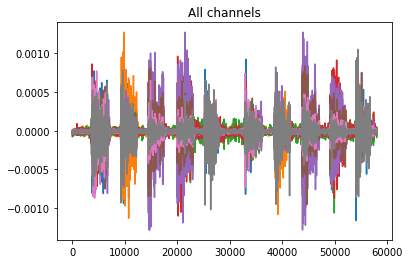

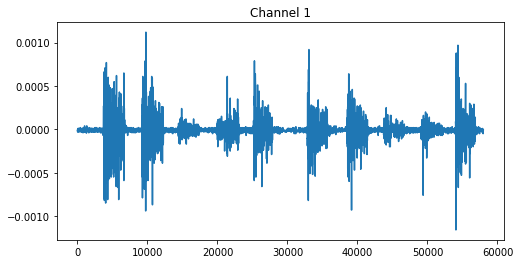

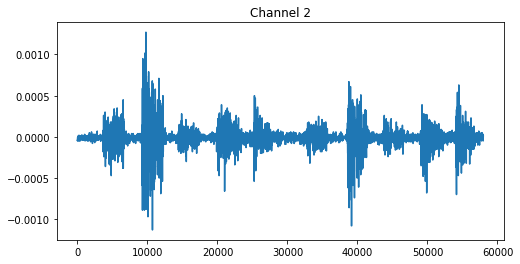

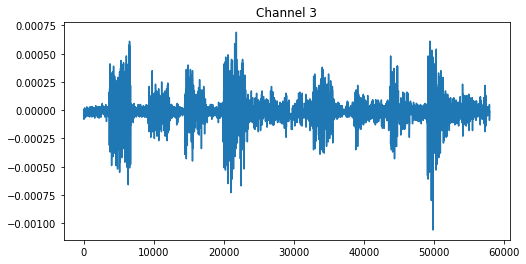

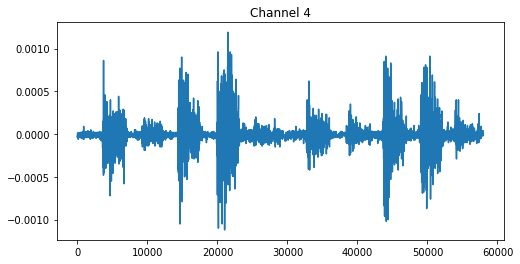

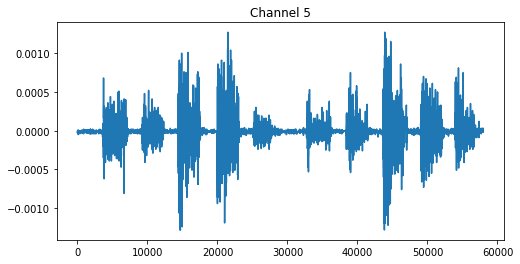

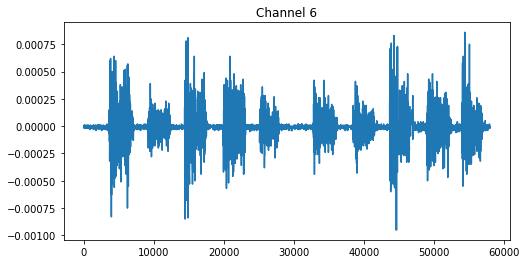

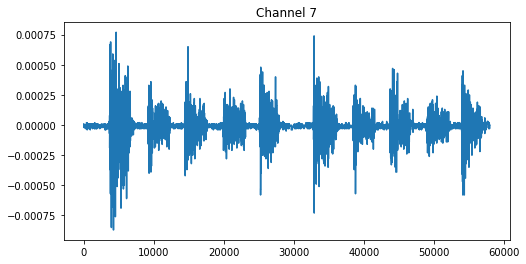

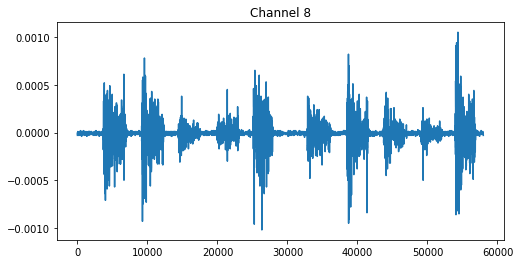

In [8]:
path =  'EMG_data_for_gestures-master\\01\\2_raw_data_13-13_22.03.16.txt'

df = pd.read_csv(path, delimiter='\t')

# Exibindo os canais em formato de série temporal
for i in range(8):
    plt.plot(df['channel' + str(i + 1)])
    plt.title('All channels')

for i in range(8):
    plt.figure(figsize=(8, 4))  # Tamanho da nova figura
    plt.plot(df['channel' + str(i + 1)])
    plt.title('Channel ' + str(i + 1))


Concatenando os dados

In [11]:
df_list = []
for i in range(36):
    path = 'EMG_data_for_gestures-master\\01'
    file_list = os.listdir(path)
    df_list.append(pd.read_csv(path + '\\' + file_list[0], delimiter='\t'))
    df_list.append(pd.read_csv(path + '\\' + file_list[1], delimiter='\t'))


In [13]:
df_combined = pd.concat(df_list, axis=0, ignore_index=True)
df_combined.describe()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
count,4.362120e+06,4.362120e+06,4.362120e+06,4.362120e+06,4.362120e+06,4.362120e+06,4.362120e+06,4.362120e+06,4.362120e+06,4.362120e+06
mean,3.161689e+04,-7.865478e-06,-8.929025e-06,-9.766196e-06,-1.076941e-05,-1.398457e-05,-1.164463e-05,-9.673186e-06,-8.769745e-06,1.225047e+00
std,1.830538e+04,1.352620e-04,1.321001e-04,1.197704e-04,1.514824e-04,1.930697e-04,1.480037e-04,1.214849e-04,1.332664e-04,1.952346e+00
min,1.000000e+00,-1.160000e-03,-1.130000e-03,-1.060000e-03,-1.120000e-03,-1.280000e-03,-1.120000e-03,-1.090000e-03,-1.020000e-03,0.000000e+00
25%,1.578400e+04,-3.000000e-05,-4.000000e-05,-5.000000e-05,-4.000000e-05,-4.000000e-05,-4.000000e-05,-3.000000e-05,-3.000000e-05,0.000000e+00
50%,3.155200e+04,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,0.000000e+00
75%,4.736700e+04,1.000000e-05,2.000000e-05,3.000000e-05,2.000000e-05,1.000000e-05,1.000000e-05,1.000000e-05,1.000000e-05,2.000000e+00
max,6.566100e+04,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,6.000000e+00


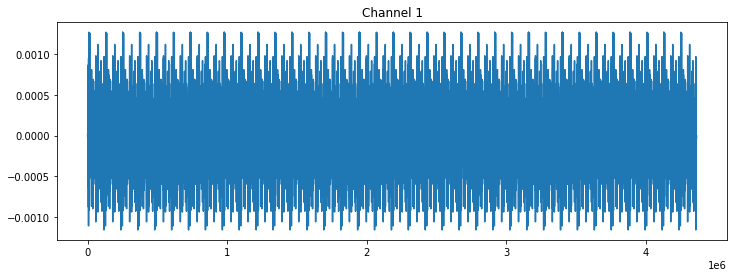

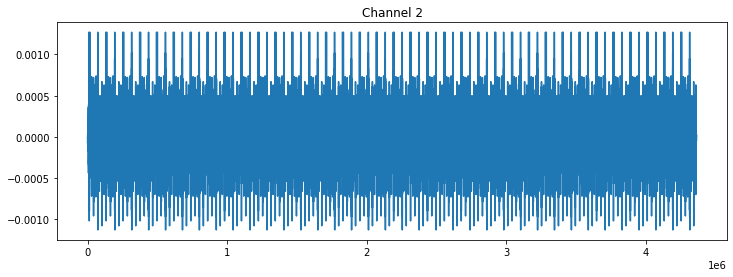

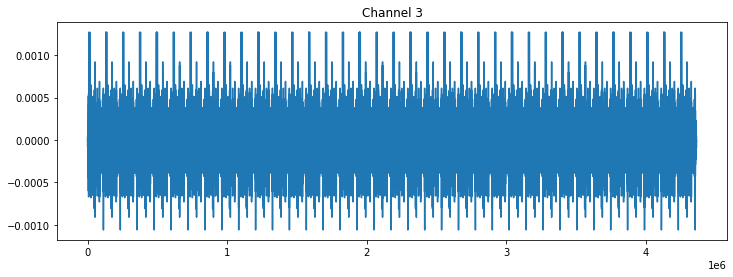

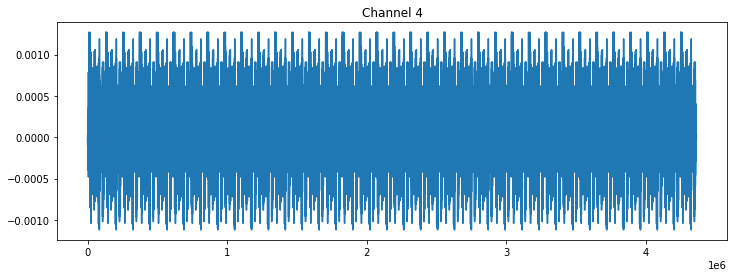

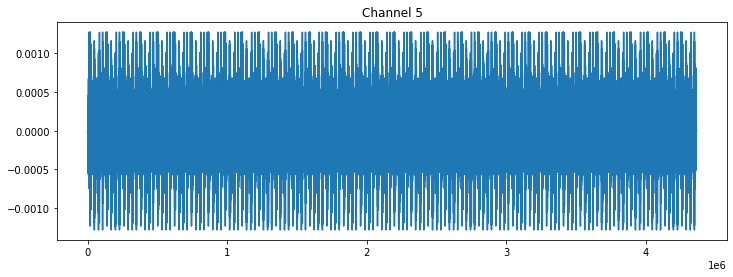

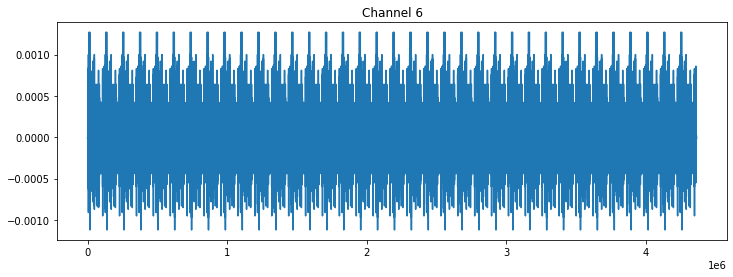

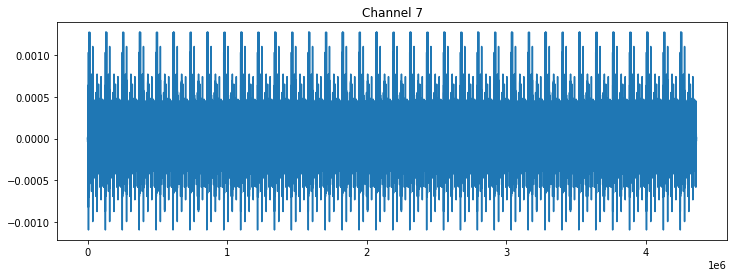

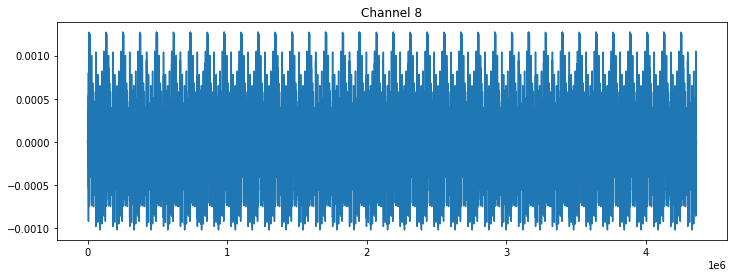

In [14]:
for i in range(8):
    plt.figure(figsize=(12, 4))  # Tamanho da nova figura
    plt.plot(df_combined['channel' + str(i + 1)])
    plt.title('Channel ' + str(i + 1))

Removing unmmarked data

In [15]:
df_combined.drop(df_combined[df_combined['class'] == 0].index, inplace=True)

Podemos talvez usar uma RNN (Redes Neurais Recorrentes) pra fazer a classificação, vou colar aqui um modelinho do chat gpt pronto e depois podemos surgir com novas ideias que fiquem mais efetivas 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Suponha que 'df' é o DataFrame contendo suas séries temporais multivariadas e 'target' é a coluna de rótulos/classes.
# Certifique-se de ajustar 'seu_arquivo.csv' para o nome do seu arquivo ou utilizar o seu DataFrame real.

# Carregar dados
df = pd.read_csv('seu_arquivo.csv')

# Dividir em recursos (X) e rótulos (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (opcional, dependendo do método de normalização desejado)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter os rótulos para o formato one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape dos dados para o formato (amostras, passos no tempo, características)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Construir o modelo RNN
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2, activation='softmax'))  # Substitua '2' pelo número de classes do seu problema

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')


Há uma sazonalidade, mas qual é o tamanho?
Uma abordagem comum é fazer o detrend primeiro, para facilitar a visualização.